In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('data/FIFA-21 Complete.csv', sep=';')

df.shape

(17981, 9)

In [6]:
df.head()

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid


In [7]:
df = df.drop_duplicates()
df.shape

(17981, 9)

There are 17981 players and 9 features describing each players

${\textbf{Let do Analysis}}$

In [13]:
# 5 oldest players in the dataset
df.sort_values(by='age', ascending=False)[['name', 'age', 'nationality', 'hits', 'overall']].head()

,name,age,nationality,hits,overall
13767,Hussain Omar Sulaimani,43,Saudi Arabia,1,63
12887,Leao Butrón,43,Peru,0,64
14977,Luis Fernando Fernández,42,Colombia,0,61
222,Gianluigi Buffon,42,Italy,50,83
726,Hilton,42,Brazil,6,79


The oldest player in the data is Hussain Omar Sulaimani aged 43 years from Saudi Arabia with just 1 hits

Gianluigi Buffon Popularly Known as Gigi is ranked 4th oldest player in the dataset aged 42 and has 50 hits with overall performance rate of 83. Known for his contributions to how big the Juventus club is now. Amazing man

In [18]:
# 5 oldest players in the dataset
df.sort_values(by=['age', 'overall'], ascending=[True, False])[['name', 'age', 'nationality', 'hits', 'overall']].head()

,name,age,nationality,hits,overall
1637,Eduardo Camavinga,17,France,94,75
2728,Ansu Fati,17,Spain,243,73
3366,Pedri,17,Spain,54,72
9349,Marco Kana,17,Belgium,27,66
9446,Giovanni Reyna,17,United States,36,66


`Eduardo Camavinga` is the youngest player with the highest overall performance, closely followed by 2 youngster from spain (`Ansu Fati` and `Pedri`) both playing for the **Barcelona** club with overall performance of 73 and 72 respectively.

In [21]:
# top 5 nationality with the most players present in the dataset?
df['nationality'].value_counts().head()

England      1496
Germany      1138
Spain        1055
Argentina     970
France        948
Name: nationality, dtype: int64

`England` has the highest number of players present in the data, followed by `Germany` then `Spain`, `Argentina` then `France`

In [25]:
# in terms of % let see how much these nationality covers
df['nationality'].value_counts(normalize=True).head()*100

England      8.319893
Germany      6.328903
Spain        5.867304
Argentina    5.394583
France       5.272232
Name: nationality, dtype: float64

${\textbf{Drill abit Down}}$

In [26]:
# top 5 rated players in the top 5 countries according to numbers of players
df_england = df.loc[df.nationality == 'England']

df_england.shape

(1496, 9)

In [28]:
# top 5 most rated players
df_england.sort_values(by=['overall'], ascending=False).head()

,player_id,name,nationality,position,overall,age,hits,potential,team
15,202126,Harry Kane,England,ST,89,27,64,91,Tottenham Hotspur
23,202652,Raheem Sterling,England,RW|LW,88,25,61,90,Manchester City
55,233049,Jadon Sancho,England,RM|LM|CAM,86,20,300,94,Borussia Dortmund
64,208830,Jamie Vardy,England,ST,86,33,43,86,Leicester City
83,231281,Trent Alexander-Arnold,England,RB,85,21,135,90,Liverpool


`Tottenham Hotspur` forward `Harry Kane` is the highest rated player from England

In [29]:
# top 5 young and growing players
df_england.sort_values(by=['potential'], ascending=False).head()

,player_id,name,nationality,position,overall,age,hits,potential,team
55,233049,Jadon Sancho,England,RM|LM|CAM,86,20,300,94,Borussia Dortmund
15,202126,Harry Kane,England,ST,89,27,64,91,Tottenham Hotspur
23,202652,Raheem Sterling,England,RW|LW,88,25,61,90,Manchester City
83,231281,Trent Alexander-Arnold,England,RB,85,21,135,90,Liverpool
236,229880,Aaron Wan-Bissaka,England,RWB|RB|RW,82,22,94,89,Manchester United


`Jadon Sancho` is the most promising player while Aaron Wan-Bissaka made the top 5 talented players young and growing

In [30]:
# top 5 players with the most hits
df_england.sort_values(by=['hits'], ascending=False).head()

,player_id,name,nationality,position,overall,age,hits,potential,team
55,233049,Jadon Sancho,England,RM|LM|CAM,86,20,300,94,Borussia Dortmund
2151,246147,Mason Greenwood,England,ST|RM,74,18,274,89,Manchester United
571,233064,Mason Mount,England,CM|CAM|RW,79,21,136,87,Chelsea
83,231281,Trent Alexander-Arnold,England,RB,85,21,135,90,Liverpool
477,206517,Jack Grealish,England,CM|CAM|LW,80,24,106,85,Aston Villa


`Jadon Sancho` still leads with the hits as well. This may be attributed to the heavy link between him and Manchester United

In [32]:
# youngest players 
df_england.sort_values(by=['age', 'overall'], ascending=[True,False]).head()

,player_id,name,nationality,position,overall,age,hits,potential,team
11973,246682,Karamoko Dembélé,England,RW,64,17,45,85,Celtic
11984,246174,Harvey Elliott,England,RW,64,17,47,87,Liverpool
15954,246002,Luke Matheson,England,RB,60,17,5,83,Rochdale
16460,255206,Jay Stansfield,England,ST|CF,59,17,2,81,Fulham
16499,254482,Ricky-Jade Jones,England,ST|CAM|LW,59,17,14,84,Peterborough United


${\textbf{Now let try replicating these for other countries}}$

Next,

for countries in the top 5 countries with highest numbers of players, we want
1. Get top5 rated players on overall
2. top 5 young talent
3. top 5 players with most hits counts
4. Young players and high overalls

In [33]:
from IPython.display import display

In [54]:
def get_top5_rated_players(country):
    print(f'{country} Selected Amazing')
    try:
        df_country = df.loc[df.nationality == country]
    except:
        print('Country Name not present in the dataset or\n Mispelling, Please Check and try again')
    
    # top 5 most rated players
    print('Players Rating based on Overall Perf')
    display(df_country.sort_values(by=['overall'], ascending=False).head())
    
def get_top5_young_growing_players(country):
    print(f'{country} Selected Amazing')
    try:
        df_country = df.loc[df.nationality == country]
    except:
        print('Country Name not present in the dataset or\n Mispelling, Please Check and try again')
    
    # top 5 young and growing players
    print('Players Rating based on Potential Perf')
    display(df_country.sort_values(by=['potential'], ascending=False).head())
    
def get_top5_players_hits(country):
    print(f'{country} Selected Amazing')
    try:
        df_country = df.loc[df.nationality == country]
    except:
        print('Country Name not present in the dataset or\n Mispelling, Please Check and try again')
    
    # top 5 players with the most hits
    print('Players Rating based on Hits (Popularity)')
    display(df_country.sort_values(by=['hits'], ascending=False).head())
    
def get_top5_young_overall(country):
    print(f'{country} Selected Amazing')
    try:
        df_country = df.loc[df.nationality == country]
    except:
        print('Country Name not present in the dataset or\n Mispelling, Please Check and try again')
    
    # youngest players 
    print('Players Rating based on Young players Perf')
    display(df_country.sort_values(by=['age', 'overall'], ascending=[True,False]).head())

In [52]:
top5_countries = pd.DataFrame(df['nationality'].value_counts().head()).index.tolist()
top5_countries

['England', 'Germany', 'Spain', 'Argentina', 'France']

In [55]:
for country in top5_countries:
    get_top5_players_hits(country)
    get_top5_rated_players(country)
    get_top5_young_growing_players(country)
    get_top5_young_overall(country)

England Selected Amazing
Players Rating based on Hits (Popularity)


,player_id,name,nationality,position,overall,age,hits,potential,team
55,233049,Jadon Sancho,England,RM|LM|CAM,86,20,300,94,Borussia Dortmund
2151,246147,Mason Greenwood,England,ST|RM,74,18,274,89,Manchester United
571,233064,Mason Mount,England,CM|CAM|RW,79,21,136,87,Chelsea
83,231281,Trent Alexander-Arnold,England,RB,85,21,135,90,Liverpool
477,206517,Jack Grealish,England,CM|CAM|LW,80,24,106,85,Aston Villa


England Selected Amazing
Players Rating based on Overall Perf


,player_id,name,nationality,position,overall,age,hits,potential,team
15,202126,Harry Kane,England,ST,89,27,64,91,Tottenham Hotspur
23,202652,Raheem Sterling,England,RW|LW,88,25,61,90,Manchester City
55,233049,Jadon Sancho,England,RM|LM|CAM,86,20,300,94,Borussia Dortmund
64,208830,Jamie Vardy,England,ST,86,33,43,86,Leicester City
83,231281,Trent Alexander-Arnold,England,RB,85,21,135,90,Liverpool


England Selected Amazing
Players Rating based on Potential Perf


,player_id,name,nationality,position,overall,age,hits,potential,team
55,233049,Jadon Sancho,England,RM|LM|CAM,86,20,300,94,Borussia Dortmund
15,202126,Harry Kane,England,ST,89,27,64,91,Tottenham Hotspur
23,202652,Raheem Sterling,England,RW|LW,88,25,61,90,Manchester City
83,231281,Trent Alexander-Arnold,England,RB,85,21,135,90,Liverpool
236,229880,Aaron Wan-Bissaka,England,RWB|RB|RW,82,22,94,89,Manchester United


England Selected Amazing
Players Rating based on Young players Perf


,player_id,name,nationality,position,overall,age,hits,potential,team
11973,246682,Karamoko Dembélé,England,RW,64,17,45,85,Celtic
11984,246174,Harvey Elliott,England,RW,64,17,47,87,Liverpool
15954,246002,Luke Matheson,England,RB,60,17,5,83,Rochdale
16460,255206,Jay Stansfield,England,ST|CF,59,17,2,81,Fulham
16499,254482,Ricky-Jade Jones,England,ST|CAM|LW,59,17,14,84,Peterborough United


Germany Selected Amazing
Players Rating based on Hits (Popularity)


,player_id,name,nationality,position,overall,age,hits,potential,team
115,235790,Kai Havertz,Germany,RM|CAM,84,21,176,93,Bayer 04 Leverkusen
62,212188,Timo Werner,Germany,ST,86,24,136,89,RB Leipzig
36,212622,Joshua Kimmich,Germany,RB|CDM|CM,87,25,82,90,FC Bayern München
92,206113,Serge Gnabry,Germany,RM|LM|RW,85,25,79,87,FC Bayern München
58,222492,Leroy Sané,Germany,LW,86,24,74,90,Manchester City


Germany Selected Amazing
Players Rating based on Overall Perf


,player_id,name,nationality,position,overall,age,hits,potential,team
11,192448,Marc-André ter Stegen,Germany,GK,90,28,68,93,FC Barcelona
20,167495,Manuel Neuer,Germany,GK,89,34,42,89,FC Bayern München
17,182521,Toni Kroos,Germany,CM,89,30,37,89,Real Madrid
36,212622,Joshua Kimmich,Germany,RB|CDM|CM,87,25,82,90,FC Bayern München
46,188350,Marco Reus,Germany,CAM|CF,87,31,42,87,Borussia Dortmund


Germany Selected Amazing
Players Rating based on Potential Perf


,player_id,name,nationality,position,overall,age,hits,potential,team
11,192448,Marc-André ter Stegen,Germany,GK,90,28,68,93,FC Barcelona
115,235790,Kai Havertz,Germany,RM|CAM,84,21,176,93,Bayer 04 Leverkusen
36,212622,Joshua Kimmich,Germany,RB|CDM|CM,87,25,82,90,FC Bayern München
58,222492,Leroy Sané,Germany,LW,86,24,74,90,Manchester City
90,212190,Niklas Süle,Germany,CB,85,24,42,90,FC Bayern München


Germany Selected Amazing
Players Rating based on Young players Perf


,player_id,name,nationality,position,overall,age,hits,potential,team
16500,254480,Lilian Egloff,Germany,CAM|CF|RW,59,17,1,78,VfB Stuttgart
8117,251852,Karim Adeyemi,Germany,ST|RW|LW,67,18,20,85,FC Red Bull Salzburg
9299,254660,Jan Thielmann,Germany,RM|CF,66,18,3,84,1. FC Köln
13137,247497,Armel Bella-Kotchap,Germany,CB,63,18,6,85,VfL Bochum 1848
14948,254882,Adrian Oeynhausen,Germany,CM,61,18,1,77,SC Paderborn 07


Spain Selected Amazing
Players Rating based on Hits (Popularity)


,player_id,name,nationality,position,overall,age,hits,potential,team
2728,253004,Ansu Fati,Spain,RW|LW,73,17,243,90,FC Barcelona
557,241461,Ferrán Torres,Spain,RM|LM|CF,79,20,139,88,Valencia CF
833,213956,Adama Traoré,Spain,RWB|RW,78,24,130,84,Wolverhampton Wanderers
4233,242816,Riqui Puig,Spain,CM,71,20,100,87,FC Barcelona
6030,245037,Eric García,Spain,CB,69,19,75,85,Manchester City


Spain Selected Amazing
Players Rating based on Overall Perf


,player_id,name,nationality,position,overall,age,hits,potential,team
21,155862,Sergio Ramos,Spain,CB,89,34,55,89,Real Madrid
29,189511,Sergio Busquets,Spain,CDM,88,32,34,88,FC Barcelona
33,152729,Piqué,Spain,CB,88,33,41,88,FC Barcelona
27,193080,De Gea,Spain,GK,88,29,39,88,Manchester United
45,189513,Parejo,Spain,CM,87,31,14,87,Valencia CF


Spain Selected Amazing
Players Rating based on Potential Perf


,player_id,name,nationality,position,overall,age,hits,potential,team
2728,253004,Ansu Fati,Spain,RW|LW,73,17,243,90,FC Barcelona
21,155862,Sergio Ramos,Spain,CB,89,34,55,89,Real Madrid
91,208421,Saúl,Spain,LB|LM|CM,85,25,39,89,Atlético Madrid
417,244260,Dani Olmo,Spain,RM|LM|CAM,80,22,47,89,RB Leipzig
161,226271,Fabián,Spain,CM,83,24,32,89,Napoli


Spain Selected Amazing
Players Rating based on Young players Perf


,player_id,name,nationality,position,overall,age,hits,potential,team
2728,253004,Ansu Fati,Spain,RW|LW,73,17,243,90,FC Barcelona
3366,251854,Pedri,Spain,LM|CAM,72,17,54,89,UD Las Palmas
14067,254310,Francés,Spain,RB|LB|CB,62,17,0,80,R. Zaragoza
3386,246672,Barrenetxea,Spain,ST|RW|LW,72,18,8,84,Real Sociedad
9347,252865,Iker Losada,Spain,ST|CF,66,18,11,82,RC Celta


Argentina Selected Amazing
Players Rating based on Hits (Popularity)


,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
117,231478,Lautaro Martínez,Argentina,ST,84,22,138,91,Inter
38,211110,Paulo Dybala,Argentina,CAM|CF,87,26,95,90,Juventus
1948,202811,Emiliano Martínez,Argentina,GK,75,27,95,78,Arsenal
2155,245371,Thiago Almada,Argentina,CM|CAM|LW,74,19,83,88,Vélez Sarsfield


Argentina Selected Amazing
Players Rating based on Overall Perf


,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
12,153079,Sergio Agüero,Argentina,ST,90,32,50,90,Manchester City
38,211110,Paulo Dybala,Argentina,CAM|CF,87,26,95,90,Juventus
48,183898,Ángel Di María,Argentina,RW|LW,87,32,41,87,Paris Saint-Germain
69,201399,Mauro Icardi,Argentina,ST,86,27,47,87,Paris Saint-Germain


Argentina Selected Amazing
Players Rating based on Potential Perf


,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
117,231478,Lautaro Martínez,Argentina,ST,84,22,138,91,Inter
38,211110,Paulo Dybala,Argentina,CAM|CF,87,26,95,90,Juventus
12,153079,Sergio Agüero,Argentina,ST,90,32,50,90,Manchester City
768,231521,Exequiel Palacios,Argentina,RM|CM|CAM,78,21,30,88,Bayer 04 Leverkusen


Argentina Selected Amazing
Players Rating based on Young players Perf


,player_id,name,nationality,position,overall,age,hits,potential,team
14994,253715,Darío Sarmiento,Argentina,LW,61,17,1,80,Estudiantes de La Plata
11863,252238,Alan Velasco,Argentina,ST|RM|LM,64,18,12,84,Independiente
13177,246107,Matías Palacios,Argentina,CAM,63,18,8,85,San Lorenzo de Almagro
14967,254578,David Ayala,Argentina,CDM,61,18,0,82,Estudiantes de La Plata
16624,248139,Yoel Juárez,Argentina,LW,59,18,1,79,Club Atlético Aldosivi


France Selected Amazing
Players Rating based on Hits (Popularity)


,player_id,name,nationality,position,overall,age,hits,potential,team
13,231747,Kylian Mbappé,France,ST|RW|LW,89,21,222,95,Paris Saint-Germain
3411,242578,Benoît Badiashile,France,CB,72,19,129,79,AS Monaco Football Club SA
431,229558,Dayot Upamecano,France,CB,80,21,127,89,RB Leipzig
1652,243715,William Saliba,France,CB,75,19,96,88,AS Saint-Étienne
1637,248243,Eduardo Camavinga,France,CM,75,17,94,86,Stade Rennais FC


France Selected Amazing
Players Rating based on Overall Perf


,player_id,name,nationality,position,overall,age,hits,potential,team
13,231747,Kylian Mbappé,France,ST|RW|LW,89,21,222,95,Paris Saint-Germain
16,194765,Antoine Griezmann,France,ST|CF|LW,89,29,66,89,FC Barcelona
14,215914,N'Golo Kanté,France,CDM|CM,89,29,75,89,Chelsea
31,165153,Karim Benzema,France,ST|CF,88,32,51,88,Real Madrid
37,212218,Aymeric Laporte,France,CB,87,26,38,90,Manchester City


France Selected Amazing
Players Rating based on Potential Perf


,player_id,name,nationality,position,overall,age,hits,potential,team
13,231747,Kylian Mbappé,France,ST|RW|LW,89,21,222,95,Paris Saint-Germain
37,212218,Aymeric Laporte,France,CB,87,26,38,90,Manchester City
59,220440,Clément Lenglet,France,CB,86,25,58,90,FC Barcelona
156,231443,Ousmane Dembélé,France,RW|LW,83,23,82,90,FC Barcelona
321,234906,Houssem Aouar,France,LM|CM,81,22,71,89,Olympique Lyonnais


France Selected Amazing
Players Rating based on Young players Perf


,player_id,name,nationality,position,overall,age,hits,potential,team
1637,248243,Eduardo Camavinga,France,CM,75,17,94,86,Stade Rennais FC
12933,255839,Janis Antiste,France,ST,63,17,2,80,Toulouse Football Club
16461,255174,Lisandru Tramoni,France,RM,59,17,0,74,Athlétic Club Ajaccio
17003,255932,Lenny Lacroix,France,CB,58,17,1,77,Football Club de Metz
4182,252961,Tanguy Kouassi,France,CB|CDM,71,18,27,80,Paris Saint-Germain


${\textbf{Now let do chart}}$

highest ranked players

In [56]:
df.columns

Index(['player_id', 'name', 'nationality', 'position', 'overall', 'age',
       'hits', 'potential', 'team'],
      dtype='object')

In [69]:
top5 = df.sort_values(by='overall', ascending=False)[['name', 'overall', 'potential', 'hits']].head()

top5

,name,overall,potential,hits
0,Lionel Messi,94,94,299
1,Cristiano Ronaldo,93,93,276
2,Neymar Jr,92,92,186
3,Virgil van Dijk,91,92,127
4,Jan Oblak,91,93,47


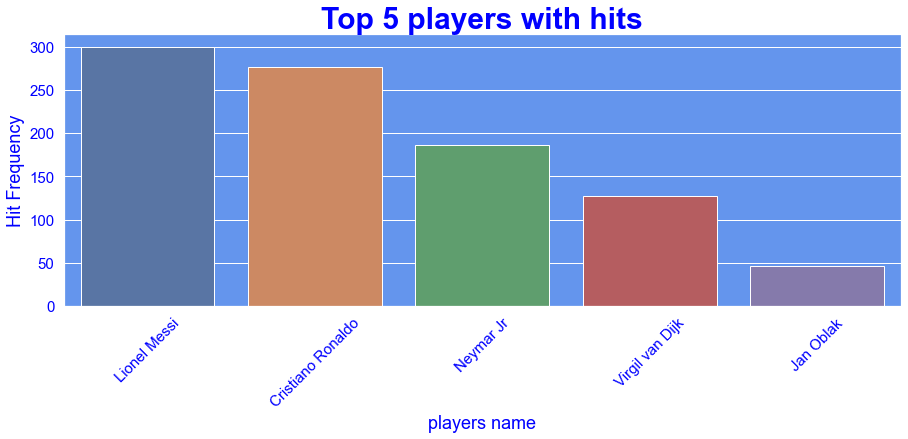

In [94]:
plt.figure(figsize=(15,5))
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.barplot(x='name', y='hits', data=top5)
plt.xticks(rotation=45, fontsize=15, color='blue'); plt.xlabel('players name', fontsize=18, color='blue')
plt.yticks(fontsize=15, color='blue'); plt.ylabel('Hit Frequency', fontsize=18, color='blue')
plt.title('Top 5 players with hits', size=30, fontweight='bold', color='blue')
plt.show()

In [80]:
# which country has the highest overall rating
top_national= df.groupby('nationality')['overall'].mean().reset_index(name='Overall Rating').sort_values(by='Overall Rating', ascending=False).head(10)
top_national

,nationality,Overall Rating
144,Tanzania,78.000000
102,Mozambique,72.000000
17,Brazil,71.422819
47,Ermenia,71.400000
1,Algeria,71.188679
42,Egypt,71.064516
8,Bahrain,71.000000
87,Libya,71.000000
151,Ukraine,70.714286
53,Gabon,70.562500


In [81]:
plt.style.use('ggplot')
import plotly.express as px

In [83]:
fig = px.bar(top_national, x='nationality', y='Overall Rating', color='nationality',
             title='Countries with the highest Average Rating')
fig.show()

To my Surpise Tanzania has the highest average rating per player is this not amazing, lot of African Countries right

Now you see why Average is most times not a good measure for many thing in this case Average rating Just MADDD

In [96]:
# which country has the highest overall rating
top_national= df.groupby('nationality')['overall'].sum().reset_index(name='Overall Rating').sort_values(by='Overall Rating', ascending=False).head(10)
top_national

,nationality,Overall Rating
44,England,97614
56,Germany,76018
136,Spain,73718
4,Argentina,67091
52,France,64735
17,Brazil,63852
74,Italy,43787
29,Colombia,37499
77,Japan,29232
104,Netherlands,28465


In [97]:
fig = px.bar(top_national, x='nationality', y='Overall Rating', color='nationality',
             title='Countries with the highest Rating')
fig.show()

In [99]:
# which country has the highest overall rating
nat_cnt = df.groupby('nationality').apply(lambda x: x['nationality'].count()).reset_index(name='Counts')
nat_cnt.sort_values(by='Counts', ascending=False, inplace=True)
top20_nat_cnt = nat_cnt[:20]
fig = px.bar(top20_nat_cnt, x='nationality', y='Counts', color='Counts', title='Nationwise Representation in the Dataset')
fig.show()

England has the highest number of players in the FiFa 21 game, well no surprises 

In [108]:
cnt_best_avg = df.groupby('nationality').apply(lambda x:np.average(x['overall'])).reset_index(name='Overall Ratings')
cnt_best_cnt = df.groupby('nationality').apply(lambda x: x['overall'].count()).reset_index(name='Player Counts')

snt_best_avg_cnt = pd.merge(cnt_best_avg, cnt_best_cnt, how='inner', on='nationality')
snt_best_avg_cnt = snt_best_avg_cnt[snt_best_avg_cnt['Player Counts'] >= 200]
snt_best_avg_cnt.sort_values(by=['Overall Ratings', 'Player Counts'], ascending=[False, False], inplace=True)

px.scatter(snt_best_avg_cnt, x='Overall Ratings', y='Player Counts', color='Player Counts', size='Overall Ratings', 
          hover_data=['nationality'], title='Nationwise Player counts and Potential')

Brasil is the country with the highest average rating with 71.42 and has 894 playes while England has 1496 players but with an average potential of 65.25 This is followed by Germany, Spain, France and Argentina

In [113]:
club_cnt = df.groupby('team').apply(lambda x: x['name'].count()).reset_index(name='Counts').sort_values(by='Counts', ascending=False)
fig = px.scatter(club_cnt, x='team', y='Counts', color='Counts', title='Clubwise Player counts in FIFA 21')
fig.show()

In [116]:
# Age Distribution
age_cnt = df.groupby('age').apply(lambda x:x['name'].count()).reset_index(name='Counts')
fig = px.bar(age_cnt, x='age', y='Counts', color='age', title='Agewise Distribution in FIFA 21')
fig.show()